# Board Level Strategic Insight Request
## Data Analyst: Lance Gabriel B. Masigon
## Date of Request: September 28, 2025

Scenario

A mid-sized financial institution has been actively expanding its personal loan portfolio. However, recent shifts in customer behavior and credit risk profiles have prompted the Board of Directors to revisit the underlying factors influencing loan approvals and amounts granted. The board is particularly concerned with credit risk, profitability, and data-driven decision-making.

During a quarterly strategy meeting, the Chief Risk Officer (CRO) presents a dashboard highlighting inconsistencies in the average loan amounts issued across customer segments. Some applicants with moderate income and lower credit scores are receiving higher-than-expected loan amounts, while more qualified applicants appear to be under-leveraged.

In response, the Chairperson of the Board raises a crucial question:

"Among all the customer attributes we’ve been collecting—like income, credit score, employment history, age, debt-to-income ratio, and education level—can we clearly identify which of these factors have the strongest statistical relationship with the loan amount issued?"

The board mandates the Data Analytics Team to conduct an immediate correlation analysis to:

1. Identify which factors most strongly drive loan amounts.

2. Distinguish between statistically significant vs. insignificant variables.

3. Support future decisions about automating loan approvals, tightening risk thresholds, or tailoring products to specific customer profiles.

Create a Business Analytics Report that address the request of the board.

In [14]:
# Import Necessary Libraries
import pandas as pd
import numpy as py
import researchpy as rp
import qdesc as qd
import scipy.stats as sc
import seaborn as sb
import matplotlib.pyplot as ml
import os

In [16]:
# Loading the dataset
df = pd.read_excel("HypotheticalLoansData.xlsx")

In [10]:
# Loading the first 10 rows of the dataset
df.head(10)

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29
5,56487.95,675.64,28,0.24,21,Master,80524.89
6,83688.19,670.38,2,0.48,28,Bachelor,77519.47
7,71511.52,656.80,26,0.22,43,High School,86387.21
8,52957.88,702.43,5,0.32,23,Master,74900.95
9,68138.40,658.45,8,0.22,24,High School,102339.46


In [18]:
# Checking the structure of the dataframe
df.info()

# Checking for missing values
print(df.isnull().values.any())
print(df.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           500 non-null    float64
 1   CreditScore      500 non-null    float64
 2   EmploymentYears  500 non-null    int64  
 3   DebtToIncome     500 non-null    float64
 4   Age              500 non-null    int64  
 5   EducationLevel   500 non-null    object 
 6   LoanAmount       500 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB
False
Income             0
CreditScore        0
EmploymentYears    0
DebtToIncome       0
Age                0
EducationLevel     0
LoanAmount         0
dtype: int64


Bases on the information above, there are currently no missing values. The dataset contains 500 entries.

In [13]:
# Simple descriptive statistics
desc = qd.desc(df)
desc

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Income,500.0,60102.57,14718.80,60191.96,9996.96,11380.99,117790.97,0.30,0.78
CreditScore,500.0,701.59,48.90,701.43,31.18,565.16,831.62,0.23,0.78
EmploymentYears,500.0,14.31,8.52,14.00,7.00,0.00,29.00,5.22,0.78
DebtToIncome,500.0,0.30,0.10,0.30,0.07,0.01,0.57,0.43,0.78
Age,500.0,42.54,12.71,42.50,11.50,21.00,64.00,6.43,0.78
LoanAmount,500.0,87561.53,13021.30,87579.97,9308.11,53960.78,119076.87,0.28,0.78


The AD_stat of Age and EmploymentYears are higher than the crit value, indicating that they are not normally distributed.

In [19]:
# Descriptive statistics grouped by EducationLevel for LoanAmount
print("Grouped by EducationLevel - LoanAmount:")
qd.grp_desc(df, 'LoanAmount', 'EducationLevel')

Grouped by EducationLevel - LoanAmount:


,EducationLevel,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Bachelor,196,88304.15,12480.19,88356.46,8512.23,55148.87,118933.66,0.21,0.77
1,High School,143,87155.92,13372.74,85927.97,8322.56,55336.11,119076.87,0.33,0.77
2,Master,108,86384.78,13692.45,87048.54,10064.15,53960.78,118226.28,0.26,0.76
3,PhD,53,88307.58,12762.66,89743.25,8897.99,56075.68,114863.34,0.20,0.74


Based on the descriptive statistics for Loan Amount grouped by Education Level, Education Level does not appear to influence the size of the loan an applicant requests. Loan Amount appears to be normally distributed regardless of the applicant's education level.


--- Variable: Income ---
  Anderson-Darling Statistic : 0.2978
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


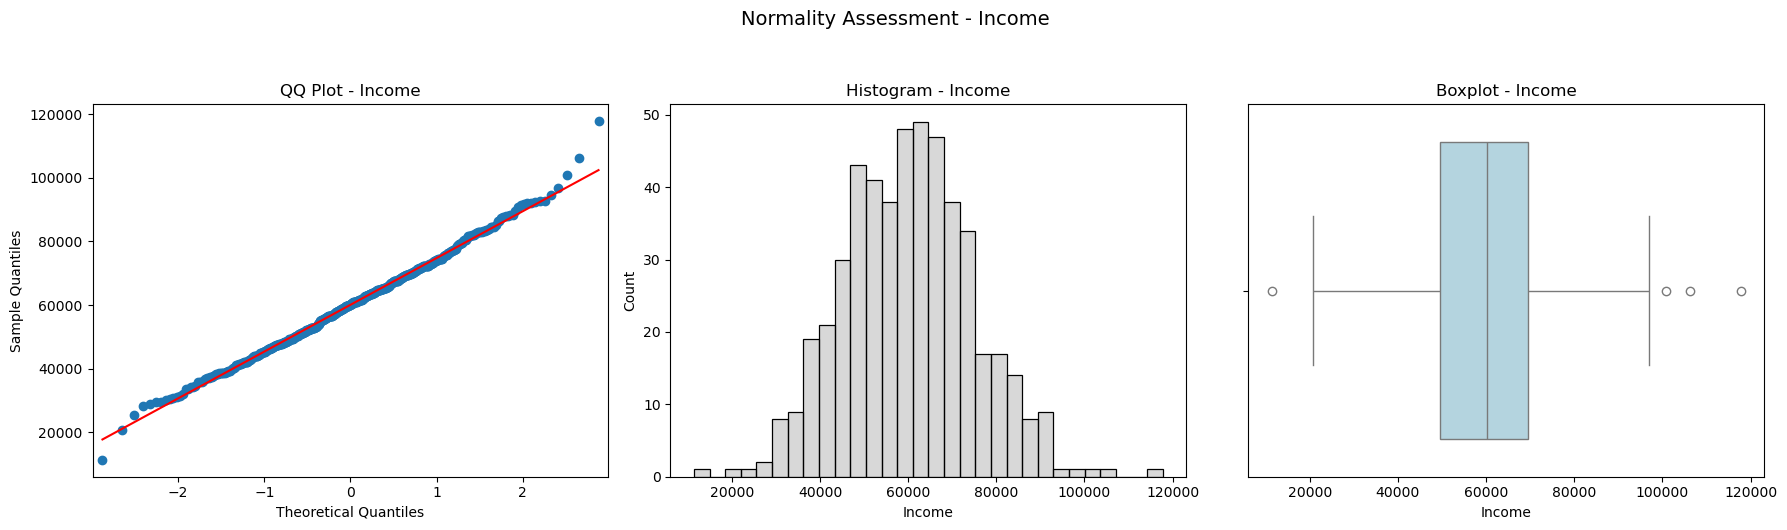


--- Variable: CreditScore ---
  Anderson-Darling Statistic : 0.2349
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


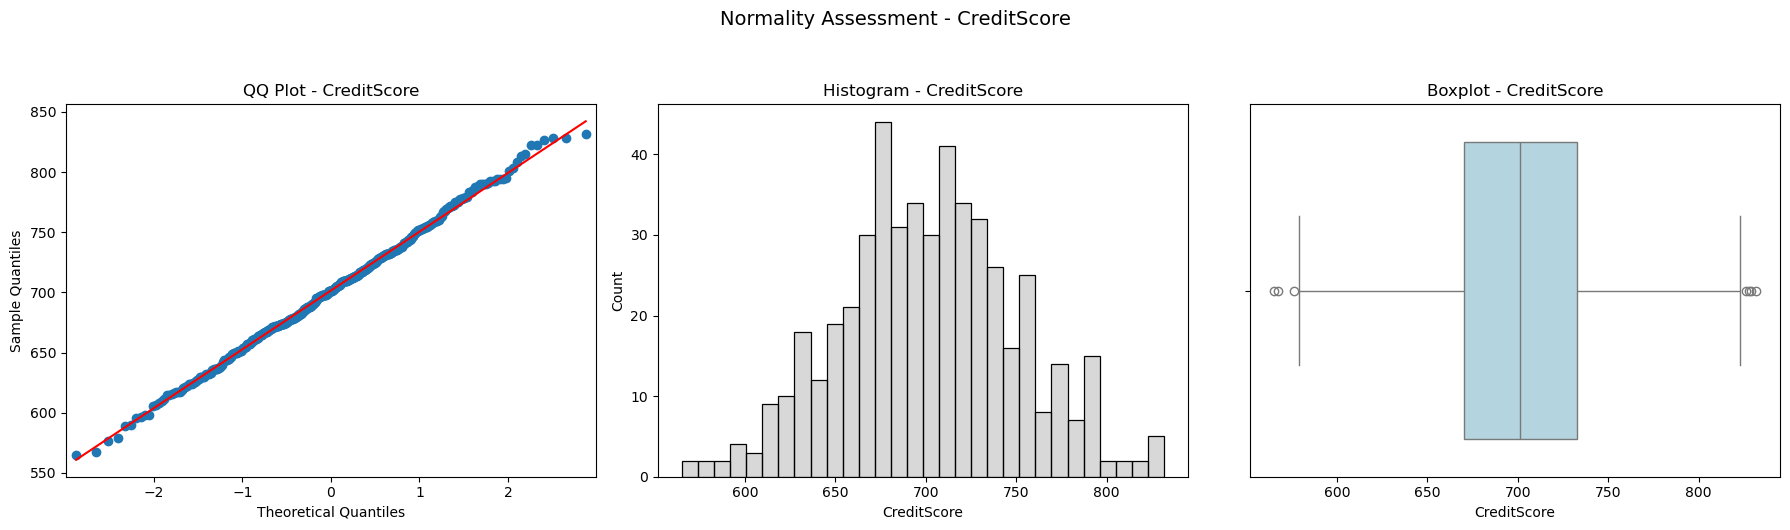


--- Variable: EmploymentYears ---
  Anderson-Darling Statistic : 5.2192
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


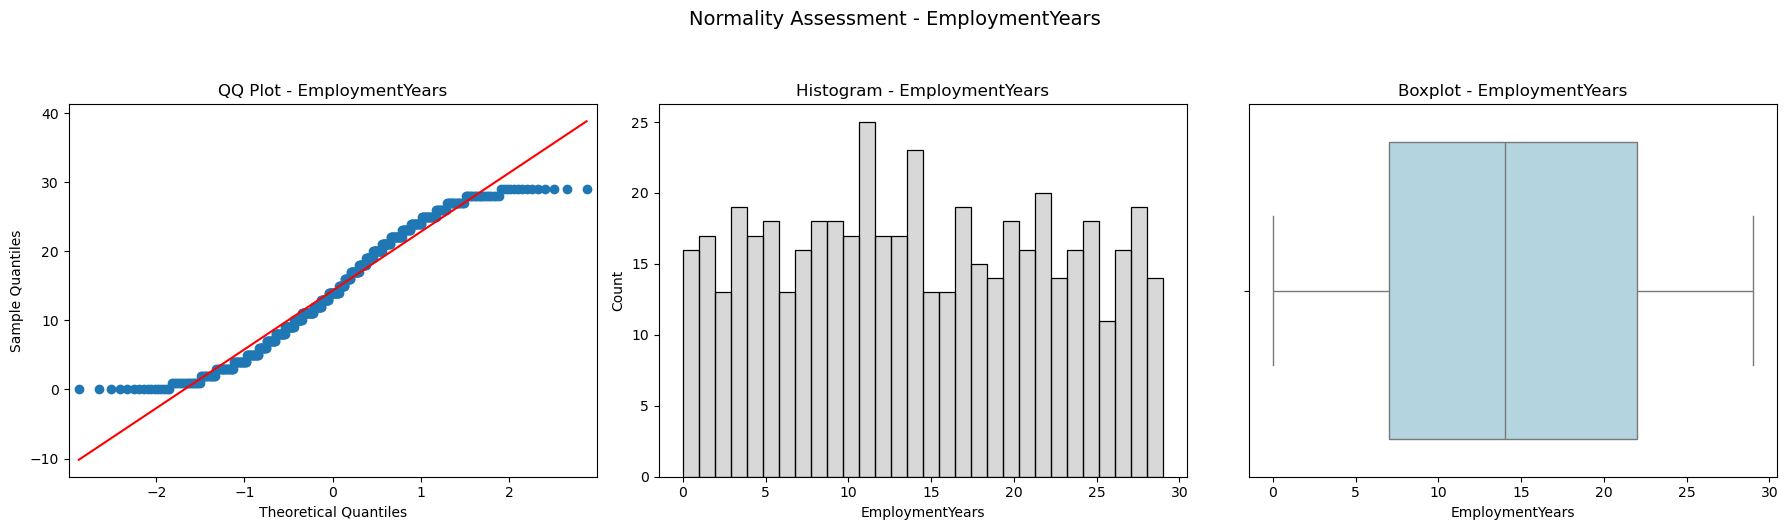


--- Variable: DebtToIncome ---
  Anderson-Darling Statistic : 0.4250
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


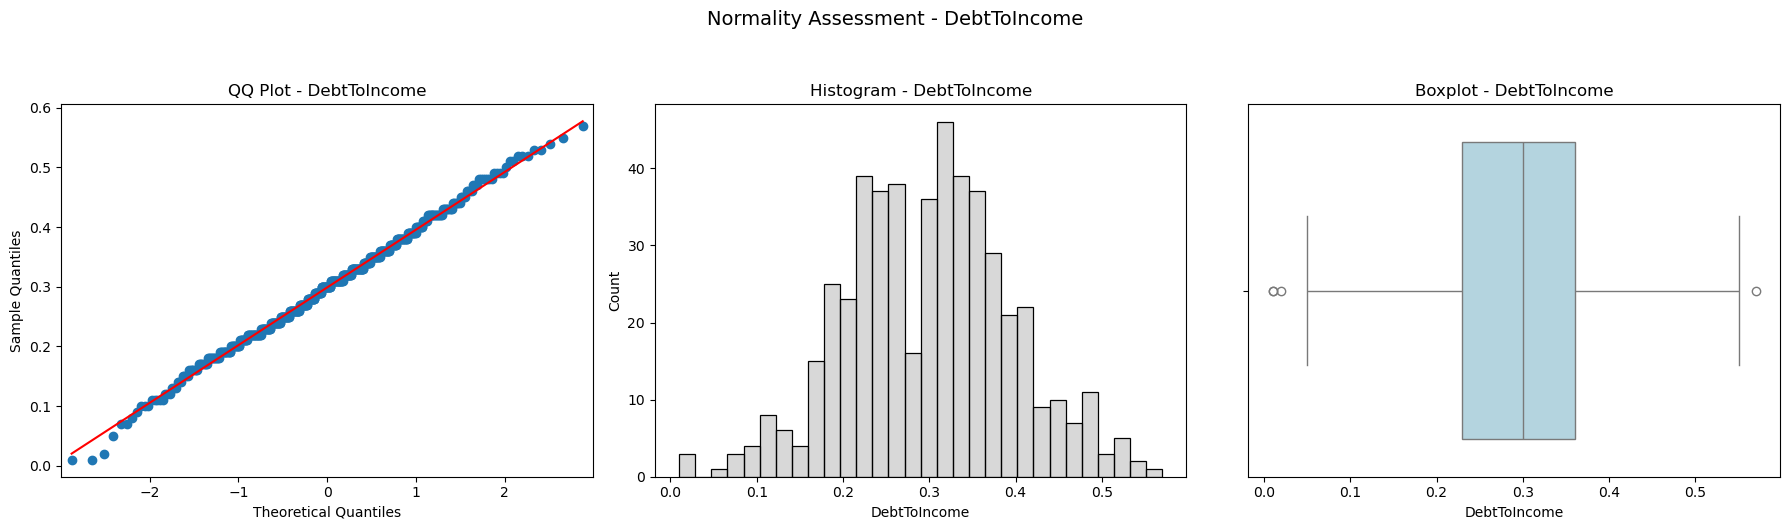


--- Variable: Age ---
  Anderson-Darling Statistic : 6.4294
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


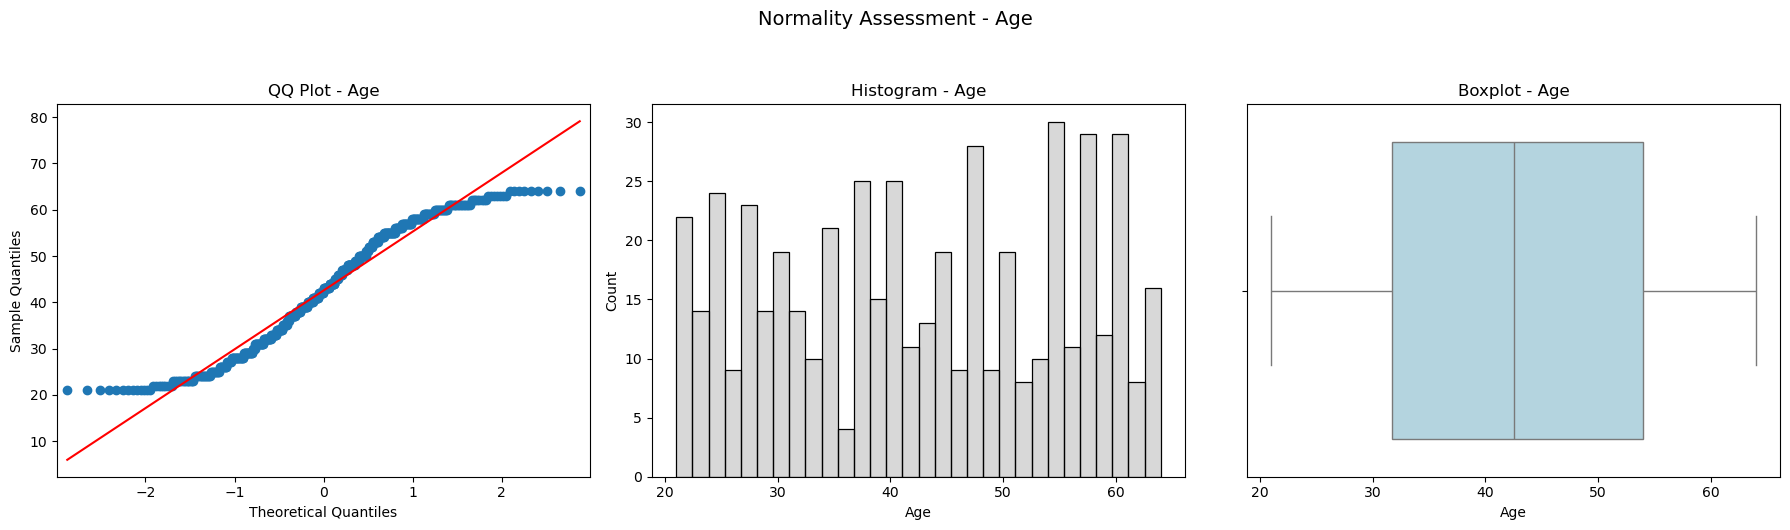


--- Variable: LoanAmount ---
  Anderson-Darling Statistic : 0.2794
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


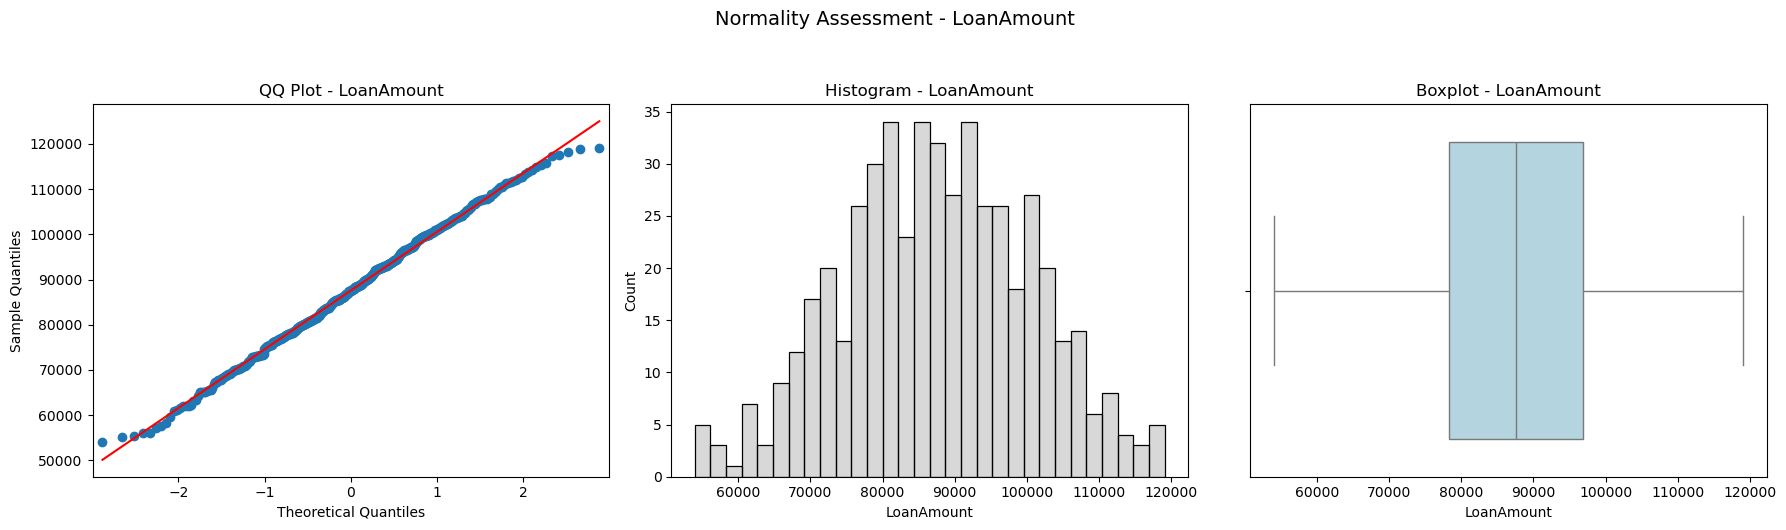

In [20]:
# Normality check dashboard (AD-test + histogram, qqplot)
qd.normcheck_dashboard(df)

## Income vs Loan Amount


In [37]:
# Correlation Analysis
cor1 = sc.spearmanr(df["Income"],df["LoanAmount"])
cor1

SignificanceResult(statistic=np.float64(0.2261075924303697), pvalue=np.float64(3.22868905404236e-07))

The statistics shows a weak positive relationship, meaning as a person's income goes up, they tend to request a higher loan amount.

Text(0.5, 1.0, 'Scatter Plot')

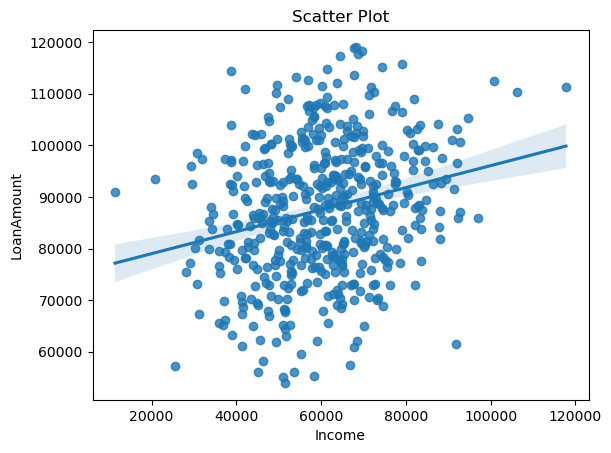

In [36]:
sb.regplot(x=df["Income"],y=df["LoanAmount"])
ml.title("Scatter Plot")

In this chart, We can see that the Income and the Loan amount has a weak positive correlation base on the line because the higher the income of the employee the higher its Loan amount will be as seen in the chart.

## Age vs Loan Amount


In [38]:
cor2 = sc.spearmanr(df["Age"], df["LoanAmount"])
cor2


SignificanceResult(statistic=np.float64(-0.03765882368758436), pvalue=np.float64(0.40075849440174827))

Based on the statistics this shows that There is no significant relationship between the two variables. 

Text(0.5, 1.0, 'Scatter Plot')

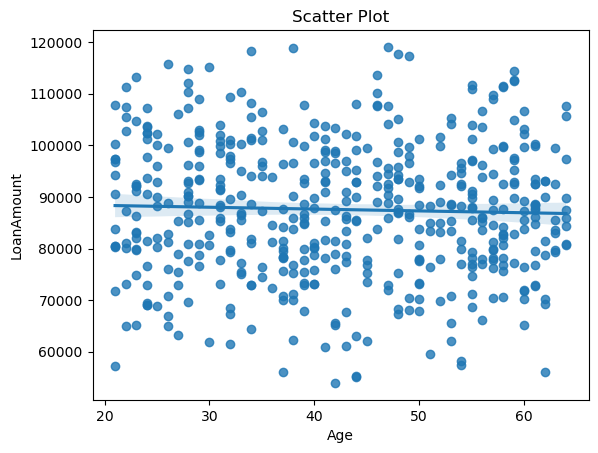

In [31]:
sb.regplot(x=df["Age"], y=df["LoanAmount"])
ml.title("Scatter Plot")

The data points are widely scattered across the entire plot area, showing no clear pattern or trend. This confirms the correlation is near zero.

## Credit Score vs Loan Amount

In [40]:
cor3 = sc.spearmanr(df["CreditScore"], df["LoanAmount"])
cor3

SignificanceResult(statistic=np.float64(0.3404539071827851), pvalue=np.float64(4.9251625195196445e-15))

Statistics shows that there is a positive relationship 

Text(0.5, 1.0, 'Scatter Plot')

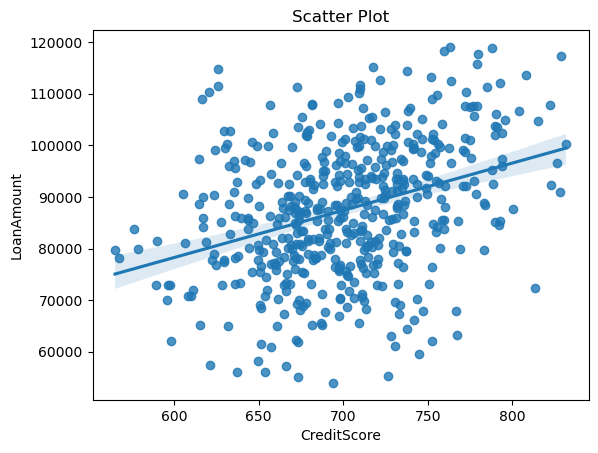

In [41]:
sb.regplot(x=df["CreditScore"], y=df["LoanAmount"])
ml.title("Scatter Plot")

The scatter plot his visually confirms the positive correlation. Applicants with a higher Credit Score tend to request a higher Loan Amount.

## Employment Years vs Loan Amount

In [44]:
cor4 = sc.spearmanr(df["EmploymentYears"], df["LoanAmount"])
cor4

SignificanceResult(statistic=np.float64(0.30133748105273284), pvalue=np.float64(5.9080186933499014e-12))

The Statistics for Employment Years and Loan Amount shows a positive relationship.

Text(0.5, 1.0, 'Scatter Plot')

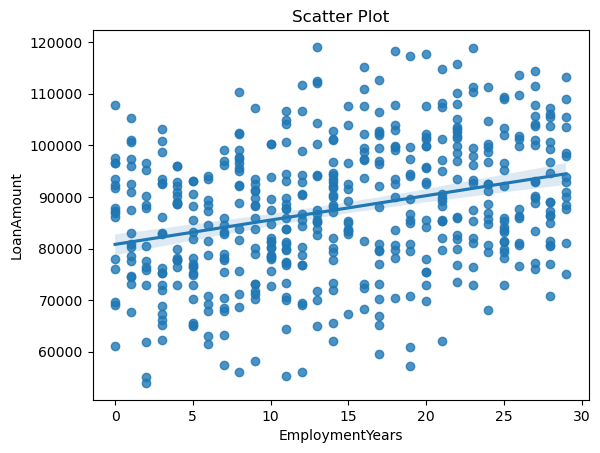

In [45]:
sb.regplot(x=df["EmploymentYears"], y=df["LoanAmount"])
ml.title("Scatter Plot")

This confirms the positive relationship between Employment Years and Loan Amount. Applicants who have worked more years tend to request or receive a slightly higher loan amount.

## Debt to Income vs Loan Amount

In [46]:
cor5 = sc.spearmanr(df["DebtToIncome"], df["LoanAmount"])
cor5

SignificanceResult(statistic=np.float64(-0.1985623553621001), pvalue=np.float64(7.695094787697505e-06))

The statistics show a weak negative relationship between DebtToIncome and Loan Amount.

Text(0.5, 1.0, 'Scatter Plot')

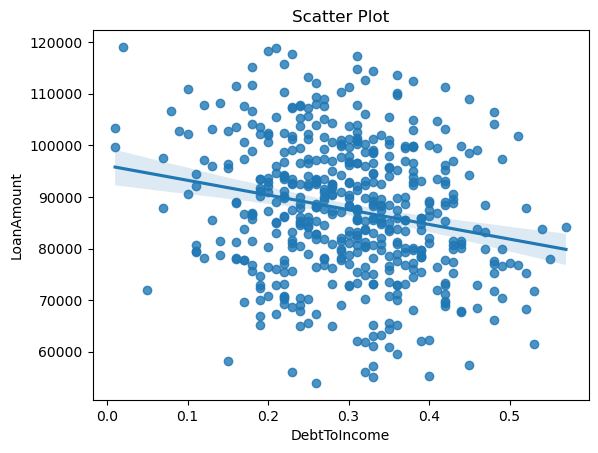

In [47]:
sb.regplot(x=df["DebtToIncome"], y=df["LoanAmount"])
ml.title("Scatter Plot")

The line on the scatter plot is sloping slightly downward. This confirms a weak negative relationship

## Summary

The Key findings for the data of a mid-size financial institutions are:

Strong and Negative Drivers
1. Positive Drivers: The loan amount is reliably and positively driven by three factors: Credit Score , Income, and Employment Years.
2. Negative Drivers: Debt to Income has a weak, but statistically significant, negative relationship
    
Strategic Recommendations for the boards:
1. Automating Loan Approvals: To efficiently automate loan approvals, the institution should structure its process around the three most reliable financial indicators: Credit Score, Income, and Employment Years. Applicants who score highly in these three areas and maintain a low Debt-to-Income ratio should be automatically approved.
2. Risk tightening efforts should prioritize the Debt-to-Income ratio, which is a factor that negatively influences loan amounts. Any applicant with a DTI exceeding 0.40 must be immediately flagged for manual review.
3. Tailoring Product: The institution should base product tiers and interest rates exclusively on Credit Score and Income, as these are the proven drivers of loan size. The best course of action is to reserve offerings for the highest loan amounts and best rates for the group who has the best Credit Scores and highest Incomes.